# Differential equations and numerical integration
## Euler method

We will mainly use ordinary differential equations of the form.

\begin{equation}
\frac{d\vec{x}}{dt} = \vec{f}(\vec{x},\vec{p},t)
\end{equation}

Here $\vec{x}$ is a vector of state variables at time $t$.
The parameters of the system are represented
by the vector $\vec{p}$.

In one dimension, the system is written as

\begin{equation} \label{eq:SimpleEq}
\frac{dx}{dt} = f(x) \quad \mbox{with} \quad x(t=0) := x_0
\end{equation}

And the time-invariant steady states are

\begin{equation}
\frac{dx}{dt} = 0 \quad \Leftrightarrow \quad f(x^*) = 0
\end{equation}

The stability of the steady state is determined by the derivative: 

\begin{equation}
f'(x^*)<0
\end{equation}

The simplest way to solve the equation numerically 
is the Euler integration

\begin{equation}
f(x) = \frac{dx}{dt} \approx \frac{x(t+\Delta t) - x(t)}{\Delta t}
\end{equation}

We obtain
\begin{equation}
x(t+\Delta t) \; = \;  x(t) \; + \; \Delta t \;   f(x(t)) \; + \;  {\cal O}(\Delta t^2)
\end{equation}

Starting from an initial value $x_0$ at time $t=0$ the solution
can now be determined for later time points.

It is of importance to consider the error of the method.
The Euler method introduces an error of ${\cal O}(\Delta t^2)$ per
integration step.
To obtain the solution $x(t)$ at a time $t=T$, $N=T/\Delta t$ integration steps
have to be performed. 
The total error is therefore of the order ${\cal O}(T \Delta t)$ 
and decreases with decreasing $\Delta t$.
Euler integration is a first-order method.
The method is rarely used in real life (too inefficient).

## Example Euler Method
We now solve a simple example system with the Euler Method

\begin{equation} \label{eq:EulerSimpleEquation}
\frac{dx}{dt} = f(x) = -k x \quad \mbox{with} \quad x(0) = x_0
\end{equation}

For $k>0$ the equation has a stable fix-point at $x=0$. 

The analytical solution at time $t$ is 

\begin{equation} \label{eq:EulerBeispiel}
x(t) = x_0 \exp(-k t)
\end{equation}

We now write a simple function that compares the numerical integration 
of the simple system with the (known) analytical solution. 

In [14]:
%matplotlib inline

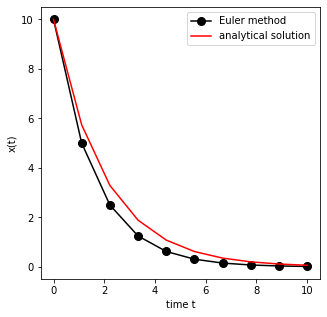

In [13]:
import numpy as np
from matplotlib import pyplot as plt

def EulerIntegrator(f_dydt, y0, t_span, N):
    """ The function integrates the simple
    system dx/dt = -k x to a time T using the  
    Euler method (N Steps) and initial condition x0.
    
    param f_dydt: ode system as f(y,t) which returns dy/dt
    param y0: initial values
    param t_span: 2-tuple of floats, interval of integration
    param N: number of time points

    usage: x = SimpleEuler(f, y0, [t_start, t_end], N)
    """
    k = 1 # set parameter k

    # some parameters
    T = float(t_span[1] - t_span[0])
    dt = T/N
    time_vec = np.linspace(t_span[0], t_span[1], num=N)
    x = [float(y0)]

    # integration
    y_vec = []
    for k, t in enumerate(time_vec):
        if k == 0:
            y = y0
        else:
            y = y + dt * f_dydt(y,t)
        y_vec.append(y)
    
    return y_vec, time_vec


def exponential_decay(y, t):
    """ Linear 1 dimensional ODE"""
    dydt = -0.5 * y
    return dydt

y0 = 10.0

y, t = EulerIntegrator(exponential_decay, y0=y0, t_span=[0,10], N=10)

# plot Euler and exact solution
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

ax.plot(t, y, 'ko-', markersize=8, label='Euler method')
ax.plot(t, y0*np.exp(-0.5*t),'r-',label='analytical solution')

ax.set_xlabel('time t')
ax.set_ylabel('x(t)')
ax.legend(loc='upper right')
plt.show()

## Numerical integration in python
The module `scipy.integrate` offers a variety of build-in functions for numerical integration. We will mainly `solve_ivp` (formerly `odeint`) for numerical integration. 

See also: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

In [2]:
from scipy.integrate import solve_ivp

In [3]:
help(solve_ivp)

Help on function solve_ivp in module scipy.integrate._ivp.ivp:

solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, **options)
    Solve an initial value problem for a system of ODEs.
    
    This function numerically integrates a system of ordinary differential
    equations given an initial value::
    
        dy / dt = f(t, y)
        y(t0) = y0
    
    Here t is a one-dimensional independent variable (time), y(t) is an
    n-dimensional vector-valued function (state), and an n-dimensional
    vector-valued function f(t, y) determines the differential equations.
    The goal is to find y(t) approximately satisfying the differential
    equations, given an initial value y(t0)=y0.
    
    Some of the solvers support integration in the complex domain, but note that
    for stiff ODE solvers, the right-hand side must be complex-differentiable
    (satisfy Cauchy-Riemann equations [11]_). To solve a problem in the complex
    doma

We first consider a simple linear ODE of the form

\begin{equation}
\frac{dx}{dt} = c - k \cdot x ~~,
\end{equation}
where $c$ and $k$ are parameters.
The steady state $x^0$ of the system can be straightforwardly calculated

\begin{equation}
\frac{dx}{dt} =0 \quad \leftrightarrow \quad x^0 = \frac{c}{k}
\end{equation}

To solve the system numerically, we must implement the function $f(x,t) = c - k \cdot x$
into a user-defined {\tt python} function.

In [4]:
def exponential_growth(t, y):
    """
    The function implements the simple linear
    ODE dydt = k*y
    """
    return 2.0 * y

To integrate the system numerically, we need to specify the initial condition $x^0 = x(t=0)$ and a timespan.

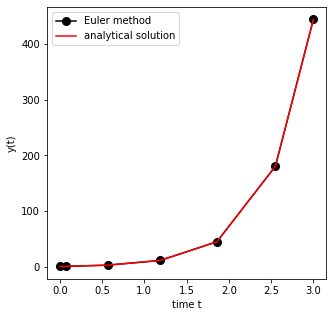

In [5]:
from scipy.integrate import solve_ivp
import numpy as np

# solve the ODE
y0 = 1.1
sol = solve_ivp(fun=exponential_growth, y0=np.array([y0]), t_span=[0, 3])

# plot both solutions
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

ax.plot(sol.t, sol.y[0], 'ko-', markersize=8, label='Euler method')
ax.plot(sol.t, y0*np.exp(2.0*sol.t),'r-',label='analytical solution')
ax.set_xlabel('time t')
ax.set_ylabel('y(t)')
ax.legend(loc='upper left')
plt.show()

## The Lotka-Volterra System
We want to implement the two-dimensional Lotka-Volterra System. A suitable function is

In [6]:
def lotka_volterra(t, x):
    """
    Implements the Lotka-Volterra System x is a two-dimensional vector
    """

    # define parameters
    X = x[0]
    Y = x[1]

    a = 1
    b = 2
    g = 1.5
    d = 2

    dxdt = a*X - b*X*Y
    dydt = g*X*Y - d*Y

    # the function returns the vector [fx, fy]
    return [dxdt, dydt]

First we have a look at state variables over time, i.e. we are looking at the oscillations of x and y through time.

The isoclines can be plotted as follows

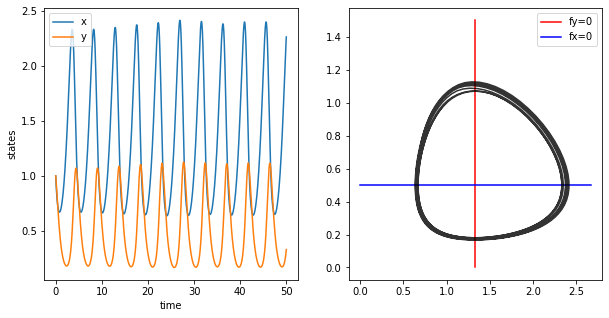

In [7]:
import pandas as pd

# parameters for lotka volterra
a = 1
b = 2
g = 1.5
d = 2

# solve the ODE
y0 = [1, 1]
sol = solve_ivp(lotka_volterra, y0=y0, t_span=[0, 50], t_eval=np.linspace(0,50, num=1001))
# store solution in dataframe
s = pd.DataFrame(np.transpose(sol.y), columns=['x', 'y'])
s['time'] = sol.t

# plot solution
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# plot timecourse
ax1.plot(s.time, s.x, label='x')
ax1.plot(s.time, s.y, label='y')

ax1.set_xlabel('time')
ax1.set_ylabel('states')
ax1.legend(loc='upper left')

# plot state space with nullklines

ax2.plot([d/g, d/g],[0, 3*a/b],'r-', label="fy=0")
ax2.plot([0, 2*d/g],[a/b, a/b],'b-', label="fx=0")
ax2.plot(s.x, s.y, 'k', alpha=0.8)
ax2.legend()
plt.show()

We can also have a more detailed look on the phase plane. A suitable method are quiver plots (`help(plt.quiver)`.

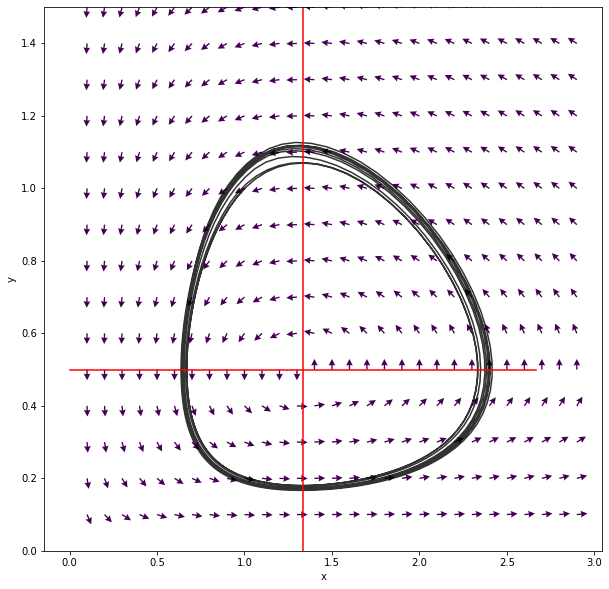

In [12]:
# solve the ODE
y0 = [1.0, 1.0]
sol = solve_ivp(lotka_volterra, y0=y0, t_span=[0, 50], t_eval=np.linspace(0,50, num=1001))
# store solution in dataframe
s = pd.DataFrame(np.transpose(sol.y), columns=['x', 'y'])
s['time'] = sol.t

x = np.arange(0.1,3,0.1); y = np.arange(0.1,3,0.1)
[xg,yg] = np.meshgrid(x,y)
n = np.size(x); m = np.size(x)
u = np.zeros([n,m])
v = np.zeros([n,m])

for i in range(n):
    for j in range(m):
        df = lotka_volterra(1, [xg[i,j],yg[i,j]])
        df = df/np.linalg.norm(df)
        u[i,j] = df[0]
        v[i,j] = df[1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
        
h = ax.quiver(xg,yg,u,v,0.5, headwidth=5)
ax.plot(s.x, s.y, 'k-', alpha=0.8)
ax.plot([d/g, d/g],[0, 3*a/b],'r-')
ax.plot([0, 2*d/g],[a/b, a/b],'r-')
ax.set_ylim(0, 1.5)
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()